# Example notebook

The purpose of this notebook is to provide examples on how to:
- decode a file with raw data (txt format)
- save the decoded file into json format
- process and visualise the decoded data


## 1. Decode file

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt

from phyling.decoder import decoder
from phyling import phyling_utils

In [2]:
path = "./"
raw_file = "example_data.txt"
data = decoder.decode(path + raw_file, verbose=True, use_s3=False)

INFO:root:<== decode start [./example_data.txt] ==>
INFO:root:load ./example_data.txt...
INFO:root:read 0.161Mb in 0.00s
INFO:root:start decoding file
INFO:root:maxiphyling old version
INFO:root:[100%]: 5k data decoded
INFO:root:Record started on 2023-01-17 11:49:30.000000. Time precision: 1000000.000ms
INFO:root:total: 4771 data
INFO:root:	gps: 0 datas
INFO:root:	imu: 4771 datas
INFO:root:<== decode end [SUCCESS] ==>
INFO:root:File decoded in 0.042s


## 2. Decode file and save data in json format

In [3]:
# Decode one file
decoder.decodeSave(path + raw_file, overwrite=False, verbose=True)

INFO:root:<== decode start [./example_data.txt] ==>
INFO:root:load ./example_data.txt...
INFO:root:read 0.161Mb in 0.00s
INFO:root:start decoding file
INFO:root:maxiphyling old version
INFO:root:[100%]: 5k data decoded
INFO:root:Record started on 2023-01-17 11:49:30.000000. Time precision: 1000000.000ms
INFO:root:total: 4771 data
INFO:root:	gps: 0 datas
INFO:root:	imu: 4771 datas
INFO:root:<== decode end [SUCCESS] ==>
INFO:root:File decoded in 0.041s


Write to ./example_data.json...


True

In [4]:
# Decode all files in a folder
processed_files = decoder.decodeSaveFolder(path, overwrite=False, verbose=True)
print(processed_files)

File already decoded (set overwrite to true to decode)
['example_data.txt']


## 3. Process and plot data

In [5]:
# Load json file
json_file = raw_file.replace(".txt", ".json")
data = phyling_utils.load_json(path + json_file)

Text(0, 0.5, 'Acc. (m/s$^2$)')

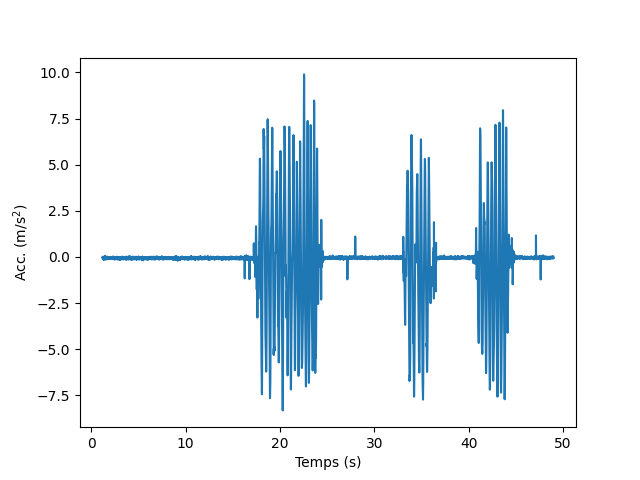

In [6]:
# Directly from data object

modName = "imu"
mod = data["modules"][modName]["data"]

plt.figure()
plt.plot(mod["T"], mod["acc_x"])
plt.xlabel("Temps (s)")
plt.ylabel("Acc. (m/s$^2$)")

In [7]:
# Convert data object to Dataframes

df = phyling_utils.data2df(data, "all")
print(list(df))
df["imu"].head()

['imu']


,T,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,1.197674,-0.028724,0.234577,9.742115,0.70,-8.12,-2.17
1,1.207692,-0.052660,0.196278,9.694242,0.63,-8.12,-2.10
2,1.217694,-0.067022,0.225002,9.684668,0.70,-8.05,-1.89
3,1.227710,0.014362,0.234577,9.737328,0.49,-8.12,-1.82
4,1.237727,-0.114895,0.248939,9.675094,0.56,-8.12,-1.82


Text(0, 0.5, 'Acc. (m/s$^2$)')

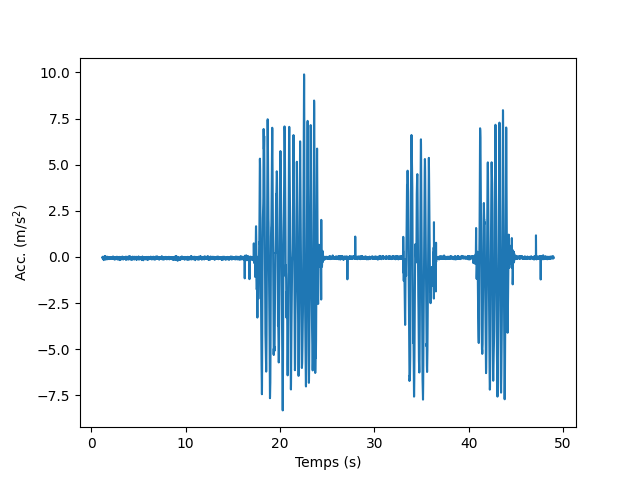

In [8]:
plt.figure()
plt.plot(df["imu"]["T"], df["imu"]["acc_x"])
plt.xlabel("Temps (s)")
plt.ylabel("Acc. (m/s$^2$)")